## PROJECT DESCRIPTION

Title: **Titanic Survival Prediction**

To build a model that predicts whether a
passenger on the Titanic survived or not.

In [33]:
# Import libraries 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [34]:
def wrangle(filepath):
    data = pd.read_csv(filepath)

    data.drop(columns = 'Name', inplace= True)
    data.drop(columns = 'Cabin', inplace = True)
    data.drop(columns = ['Fare', 'Ticket'], inplace = True)
    data.dropna(subset= 'Embarked', inplace=True)
    data.fillna(value=np.mean(data['Age']), inplace = True)

    # Encode Categorical Features
    data['Sex'] = data['Sex'].replace({'male':0, 'female':1})
    data['Embarked'] =data['Embarked'].replace({'S':0, 'C':1,'Q':2})



    return data

In [35]:
data = wrangle('Titanic-Dataset.csv')
data.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_10948\3606928450.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'male':0, 'female':1})
C:\Users\USER\AppData\Local\Temp\ipykernel_10948\3606928450.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Embarked'] =data['Embarked'].replace({'S':0, 'C':1,'Q':2})


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,0
1,2,1,1,1,38.0,1,0,1
2,3,1,3,1,26.0,0,0,0
3,4,1,1,1,35.0,1,0,0
4,5,0,3,0,35.0,0,0,0


In [36]:
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [38]:
model = RandomForestClassifier(n_estimators= 500, max_depth = 9, random_state= 42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=500, random_state=42)

In [39]:
y_pred = model.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.7921348314606742

In [41]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1], dtype=int64)

In [42]:
model.score(X_train, y_train)

0.9353023909985936

In [43]:
#import the library 
from sklearn.tree import DecisionTreeClassifier
#Instantiate the model
model2 = DecisionTreeClassifier(criterion= 'entropy', splitter= 'best',max_features= 'log2', random_state= 42)
#Fit the model
model2.fit(X_train, y_train)
#make predictions based on the model 
y_pred =model.predict(X_test)
#print the accuracy score 
print(accuracy_score(y_pred, y_test))

0.7921348314606742


In [44]:
#get the parameters of the model
model2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

model3 = LinearRegression()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)

In [46]:
y_pred.dtype

dtype('float64')

In [47]:
y_test.dtype

dtype('int64')

In [48]:
#convert y_pred to integer
y_pred = y_pred.round().astype(int)

In [49]:
accuracy_score(y_pred , y_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       106
           1       0.69      0.72      0.71        72

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178



In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[83 23]
 [20 52]]


<Axes: >

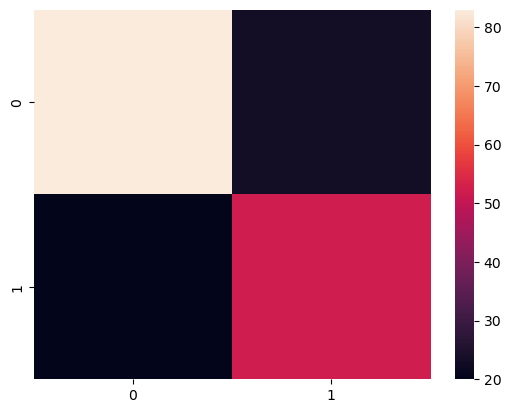

In [51]:
import seaborn as sns
confusion_matrix = confusion_matrix(y_pred,y_test)
sns.heatmap(confusion_matrix)

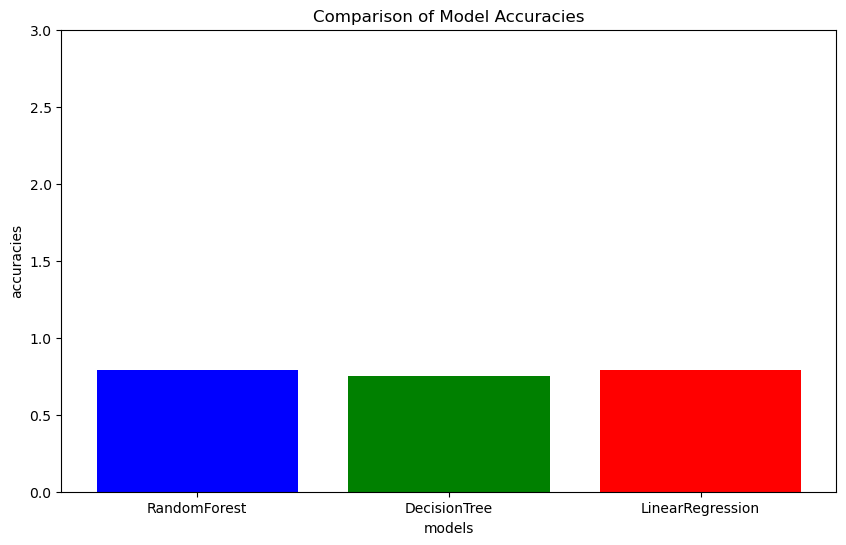

In [52]:
#check the best model to use 
import matplotlib.pyplot as plt

#assign the accuracies of each model
accuracy_a = accuracy_score(y_test, model.predict(X_test))
accuracy_b = accuracy_score(y_test, model2.predict(X_test))
accuracy_c = accuracy_score(y_test, model.predict(X_test))

#model names corresponding to their accuracy scores 
models = ["RandomForest", 'DecisionTree', 'LinearRegression']
accuracies = [accuracy_a, accuracy_b, accuracy_c]

#plot the bar graph
plt.figure(figsize=(10,6))
plt.bar(models , accuracies, color=['blue', 'green','red'])
plt.xlabel('models')
plt.ylabel('accuracies')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 3)
plt.show()

In [57]:
#create a dataset with two columns, passengerId and Survived colums 
prediction_datasheet =pd.DataFrame({'PassengerId' :data.loc[X_test.index,'PassengerId'], 'Survived': y_pred})
#save the data sheet to a csv file
prediction_datasheet.to_csv('predicted_titanic_datasheet.csv', index= False)
#display the resulting datasheet
prediction_datasheet

,PassengerId,Survived
210,211,0
226,227,0
309,310,1
366,367,1
354,355,0
...,...,...
793,794,1
68,69,0
632,633,1
832,833,0
